In [1]:
import scipy.stats as stats
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
plt.style.use('seaborn')
pandas.set_option('precision', 3)
simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pandas.read_csv('C:\\Users\\DELL\\Desktop\\creditcard.csv')

In [3]:
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
103864,68824.0,-0.550,0.853,1.133,-0.893,0.191,-1.773,1.385,-0.257,-0.426,...,-0.201,-0.814,0.224,0.845,-0.659,-0.425,0.050,0.166,29.95,0
92921,64172.0,-1.337,1.319,0.890,-0.603,-0.030,-0.038,0.791,-0.515,-0.579,...,0.783,-0.336,-0.037,-0.477,0.118,-0.782,0.089,0.025,118.00,0
22285,32148.0,-1.652,-0.208,3.758,3.450,-0.320,1.079,-0.580,0.100,0.952,...,-0.171,0.977,0.216,0.468,0.415,0.527,0.252,-0.293,6.85,0
189203,128300.0,-0.560,0.746,1.182,-0.972,0.648,-0.113,0.821,-0.102,0.379,...,-0.369,-0.832,-0.152,0.358,0.552,-0.189,0.022,-0.177,50.00,0
154,95.0,1.196,0.259,0.636,0.641,-0.395,-0.695,0.034,-0.124,-0.078,...,-0.201,-0.517,0.199,0.413,0.123,0.102,-0.008,0.020,1.29,0
171632,120743.0,-1.845,1.067,-0.305,0.477,2.378,-0.309,1.346,-0.432,-0.511,...,-0.181,-0.029,-0.968,0.135,1.181,-0.368,-0.451,0.062,44.12,0
3786,3291.0,0.659,1.453,-1.861,1.739,0.906,-1.861,1.059,-0.290,-0.354,...,-0.111,-0.178,0.214,0.032,-0.438,-0.403,0.237,0.020,49.99,0
238854,149852.0,2.020,0.062,-1.618,0.352,0.317,-0.682,0.035,-0.059,0.334,...,-0.310,-0.858,0.360,0.649,-0.338,0.145,-0.071,-0.040,0.89,0
56507,47460.0,1.381,-0.628,0.053,-0.817,-0.881,-0.699,-0.577,-0.025,-0.871,...,0.230,0.453,-0.157,0.004,0.581,-0.110,-0.024,-0.004,23.85,0
187385,127510.0,2.248,-1.421,-0.566,-1.431,-1.596,-0.913,-1.193,-0.249,-1.093,...,-0.129,0.148,0.243,0.038,-0.277,-0.182,0.026,-0.041,30.90,0


In [4]:
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,284807.000,284807.000
mean,94813.860,88.350
std,47488.146,250.120
min,0.000,0.000
25%,54201.500,5.600
50%,84692.000,22.000
75%,139320.500,77.165
max,172792.000,25691.160


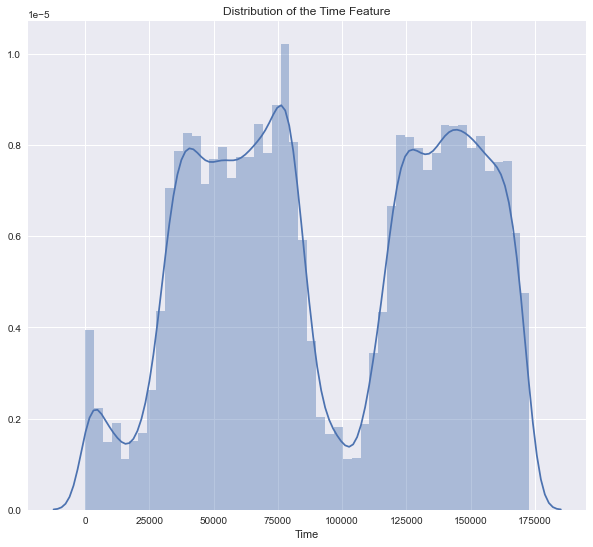

In [5]:
plt.figure(figsize=(10,9))
plt.title('Distribution of the Time Feature')
sns.distplot(df['Time'])

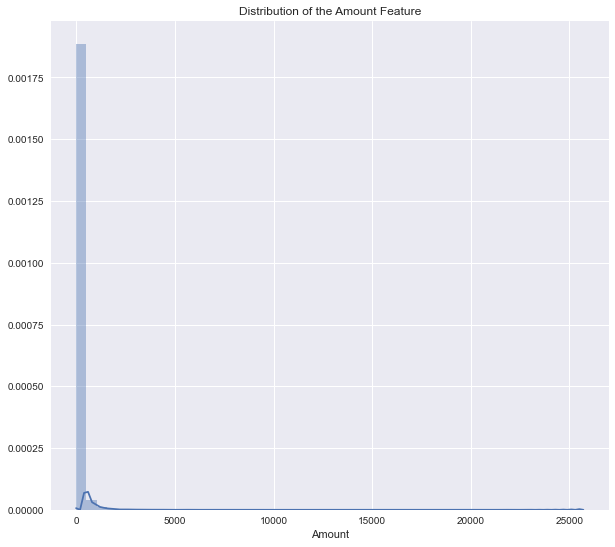

In [6]:
plt.figure(figsize=(10,9))
plt.title('Distribution of the Amount Feature')
sns.distplot(df['Amount'])

In [7]:
counts = df['Class'].value_counts()
correct = counts[0]
fraudulent = counts[1]
correct_perc = (correct/(correct+fraudulent))*100
fraudulent_perc = (fraudulent/(correct+fraudulent))*100
print('There are {} ({:.3f}%) non-fraudulent transactions and {} ({:.3f}%) fraudulent transactions.'.format(correct, correct_perc, fraudulent, fraudulent_perc))

There are 284315 (99.827%) non-fraudulent transactions and 492 (0.173%) fraudulent transactions.


Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

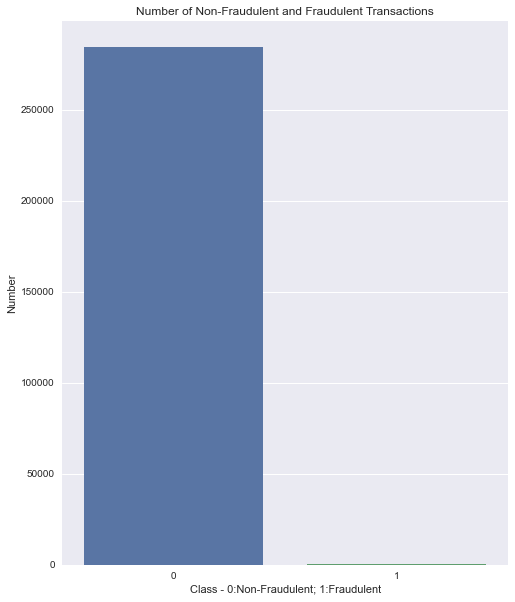

In [8]:
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')

Text(0.5, 1.0, 'Heatmap of Correlation')

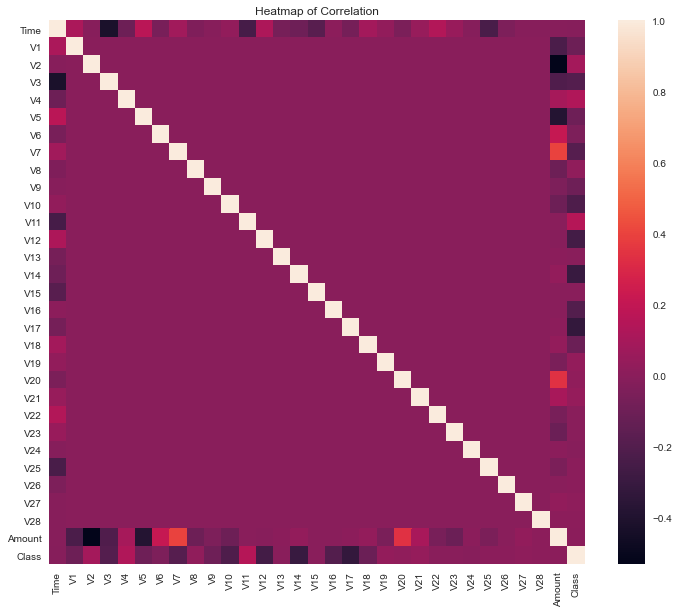

In [9]:
corr = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [10]:
from sklearn import preprocessing

# scale the time column
scaler_time = preprocessing.StandardScaler().fit(df[['Time']])
scaled_time = scaler_time.transform(df[['Time']])
scaled_time = scaled_time.flatten()

# scale the amount column
scaler_amount = preprocessing.StandardScaler().fit(df[['Amount']])
scaled_amount = scaler_amount.transform(df[['Amount']])
scaled_amount = scaled_amount.flatten()

In [11]:
# insert the scaled time and amount columns  
df.insert(0, "scaled_amount", scaled_amount, True)
df.insert(0, "scaled_time", scaled_time, True)

# delete the old time and amount columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [12]:
df.sample(5)

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
33772,-1.209,-0.323,1.345,-0.603,0.418,-0.897,-0.795,-0.074,-0.802,0.166,...,-0.001,-0.050,-0.302,0.123,-0.346,0.144,-0.444,0.017,0.004,0
99060,-0.587,-0.321,1.261,-0.074,0.283,-0.745,-0.901,-1.725,0.090,-0.328,...,-0.142,0.123,0.481,-0.093,0.951,0.719,-0.627,0.045,0.026,0
92470,-0.650,-0.340,-0.304,0.704,1.516,0.551,0.497,-0.977,0.866,-0.332,...,0.017,0.062,0.278,-0.241,0.376,0.222,-0.395,-0.134,-0.193,0
65741,-0.907,-0.350,-0.788,0.809,2.066,-0.561,-0.117,-0.783,0.634,0.165,...,-0.236,-0.170,-0.759,-0.148,0.452,0.082,-0.012,-0.032,0.047,0
155105,0.204,-0.233,-0.351,0.545,1.809,-0.060,0.006,-0.279,0.445,-0.348,...,-0.034,0.160,1.069,-0.273,0.039,-0.323,-0.206,-0.110,-0.036,0


In [13]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

In [14]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [15]:
X_train = train.loc[:,:'V28']
y_train = train.loc[:,'Class']

In [16]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [17]:
train_res = np.concatenate((X_train_res, y_train_res.values.reshape((-1,1))), axis = 1)
np.random.shuffle(train_res)
train_res = pandas.DataFrame(train_res, columns=train.columns)

Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

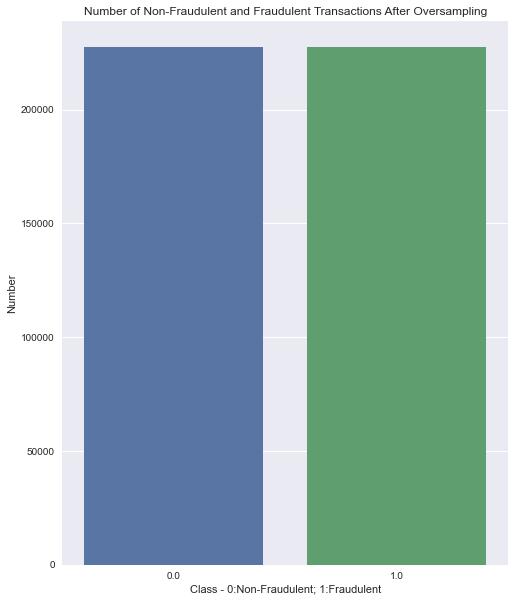

In [18]:


counts = train_res['Class'].value_counts()
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions After Oversampling')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')



In [19]:


corr = train_res.corr()
corr = corr[['Class']]



In [20]:
corr[corr['Class'] < -0.5]

,Class
V3,-0.570
V9,-0.579
V10,-0.644
V12,-0.695
V14,-0.767
V16,-0.606
V17,-0.571


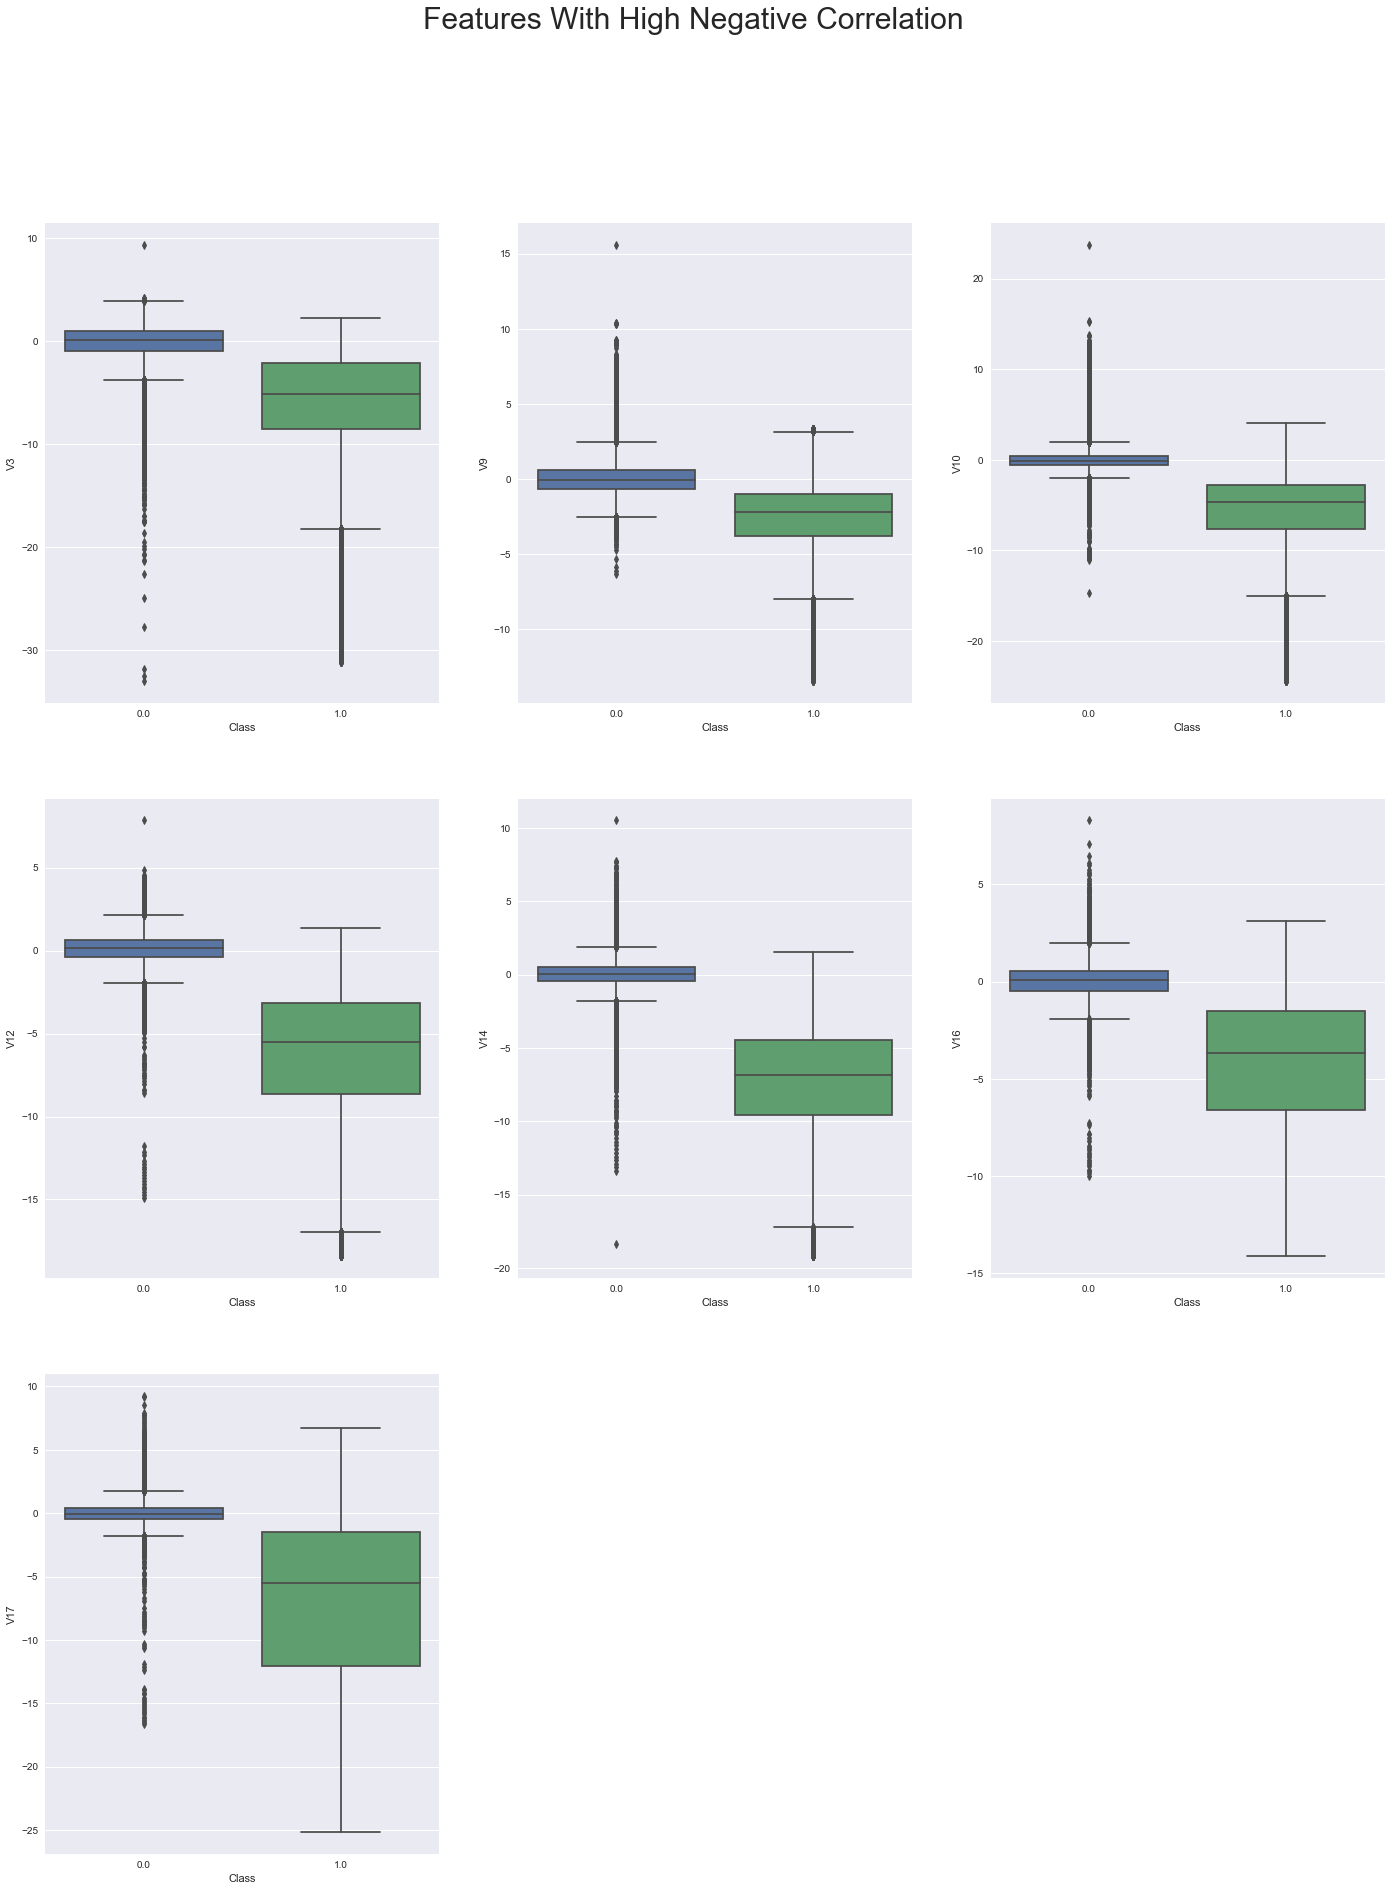

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 30))
fig.suptitle('Features With High Negative Correlation', size=30)
sns.boxplot(x="Class", y="V3", data=train_res, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=train_res, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=train_res, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=train_res, ax=axes[1,0])
sns.boxplot(x="Class", y="V14", data=train_res, ax=axes[1,1])
sns.boxplot(x="Class", y="V16", data=train_res, ax=axes[1,2])
sns.boxplot(x="Class", y="V17", data=train_res, ax=axes[2,0])
fig.delaxes(axes[2,1])
fig.delaxes(axes[2,2])

In [22]:
corr[corr.Class > 0.5]

,Class
V2,0.524
V4,0.714
V11,0.705
Class,1.000


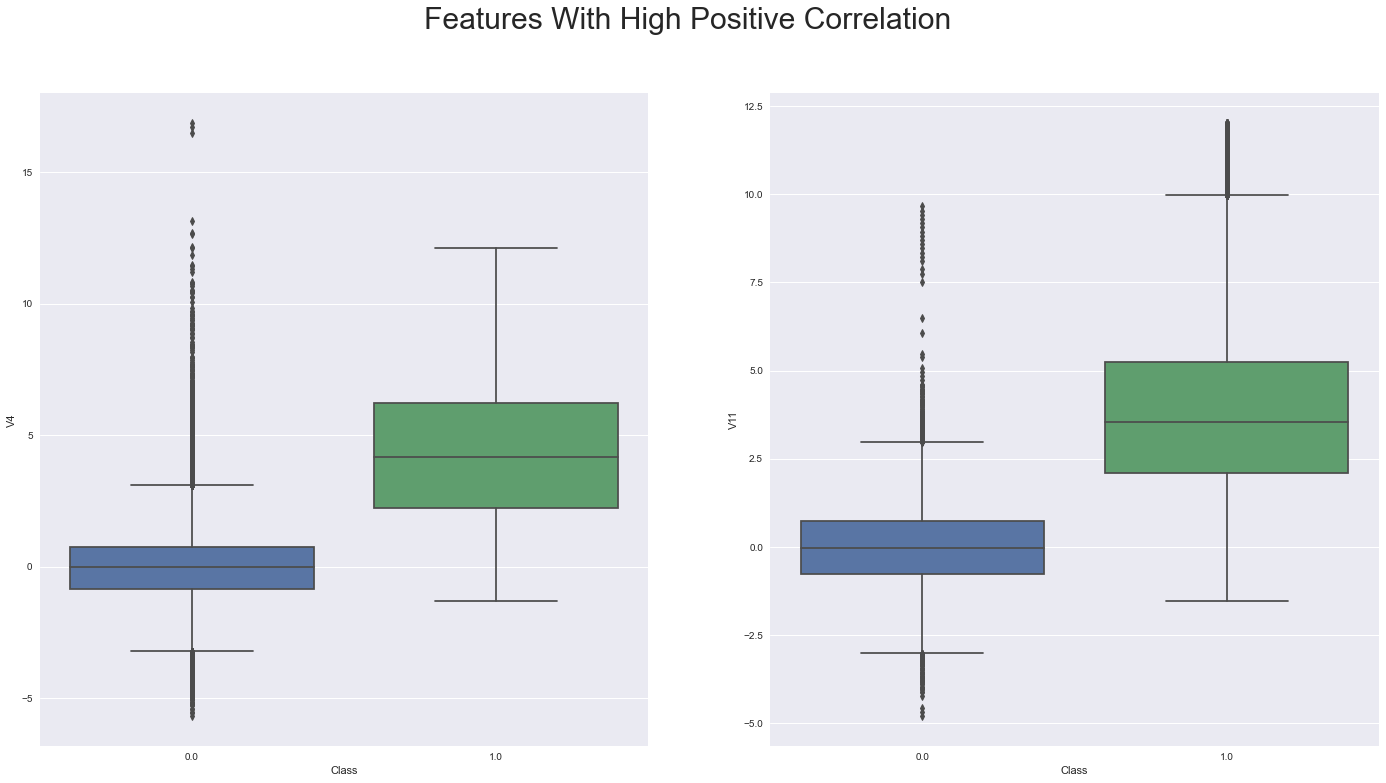

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))
fig.suptitle('Features With High Positive Correlation', size=30)
sns.boxplot(x="Class", y="V4", data=train_res, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=train_res, ax=axes[1])

In [24]:
Q1 = train_res.quantile(0.25)
Q3 = train_res.quantile(0.75)
IQR = Q3 - Q1
train2 = train_res[~((train_res < (Q1-2.5*IQR)) | (train_res > (Q3+2.5*IQR))).any(axis=1)]

In [25]:
len_after = len(train2)
len_before = len(train_res)
len_diff = len(train_res) - len(train2)
print('We reduced our data size from {} observations by {} observations to {} observations.'.format(len_before, len_diff, len_after))

We reduced our data size from 454928 observations by 121125 observations to 333803 observations.


Text(0.5, 0, 'Class - 0:Non-Fraudulent; 1:Fraudulent')

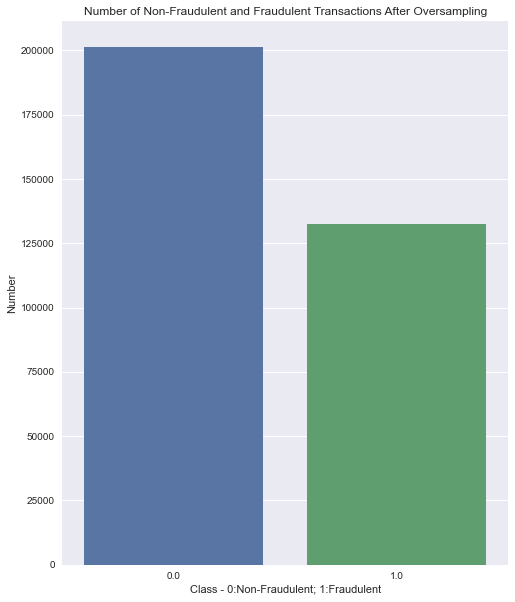

In [26]:


counts = train2['Class'].value_counts()
plt.figure(figsize=(8,10))
sns.barplot(x=counts.index, y=counts)
plt.title('Number of Non-Fraudulent and Fraudulent Transactions After Oversampling')
plt.ylabel('Number')
plt.xlabel('Class - 0:Non-Fraudulent; 1:Fraudulent')



In [27]:


from sklearn.manifold import TSNE

subtrain2 = train2.sample(1000)
X = subtrain2.loc[:,:'V28']
y = subtrain2.loc[:,'Class']
X_tsne = TSNE(n_components=2, random_state=42, verbose=5).fit_transform(X.values)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 1.971010
[t-SNE] Computed conditional probabilities in 0.034s
[t-SNE] Iteration 50: error = 65.3546753, gradient norm = 0.2667702 (50 iterations in 0.229s)
[t-SNE] Iteration 100: error = 64.4155960, gradient norm = 0.2613343 (50 iterations in 0.213s)
[t-SNE] Iteration 150: error = 63.5222015, gradient norm = 0.2471126 (50 iterations in 0.206s)
[t-SNE] Iteration 200: error = 63.4532051, gradient norm = 0.2538566 (50 iterations in 0.212s)
[t-SNE] Iteration 250: error = 63.1430244, gradient norm = 0.2472877 (50 iterations in 0.213s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.143024
[t-SNE] Iteration 300: error = 0.7829867, gradient norm = 0.0009254 (50 iterations in 0.178s)
[t-SNE] Iteration 350: error = 0.6804660, gradient norm = 0.00042

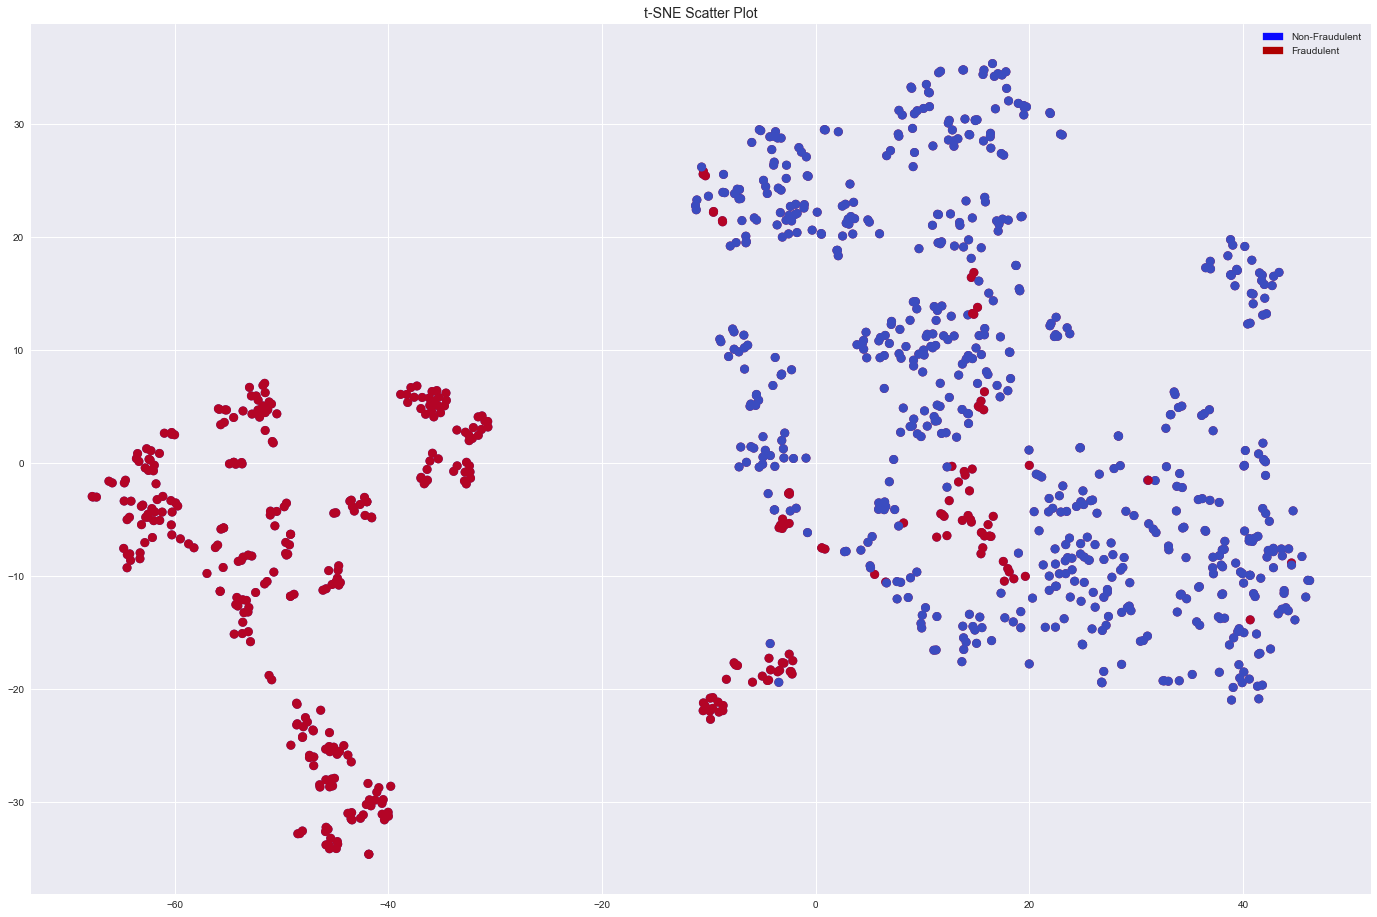

In [28]:


# scatter plot
import matplotlib.patches as mpatches

fig, ax = plt.subplots(figsize=(24,16))

blue_patch = mpatches.Patch(color='#0A0AFF', label='Non-Fraudulent')
red_patch = mpatches.Patch(color='#AF0000', label='Fraudulent')

ax.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Non-Fraudulent', linewidths=2)
ax.scatter(X_tsne[:,0], X_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraudulent', linewidths=2)
ax.set_title('t-SNE Scatter Plot', fontsize=14)
ax.grid(True)
ax.legend(handles=[blue_patch, red_patch])



In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier

In [30]:


subtrain2 = train2.sample(20000)
X_train = subtrain2.loc[:,:'V28']
y_train = subtrain2.loc[:,'Class']
X_test = test.loc[:,:'V28'].values
y_test = test.loc[:,'Class'].values



In [37]:
kfold = KFold(n_splits=10, random_state=42,shuffle=True)
clf = XGBClassifier(objective ='reg:logistic',use_label_encoder=False)
cv_results = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='roc_auc')
print('XGB ROCAUC on validation data: {0:.5f} {1:.5f}'.format(cv_results.mean(), cv_results.std()))

XGB ROCAUC on validation data: 0.99999 0.00001


In [49]:
clf.fit(X_train.values, y_train.values, eval_metric='auc', verbose=True)
y_pred = clf.predict(X_test)
roc_auc = roc_auc_score(y_test, y_pred)
print("XGB ROCAUC on test data: %f" % (roc_auc))

XGB ROCAUC on test data: 0.908450


In [50]:
cnf_matrix = confusion_matrix(y_test, y_pred)

In [51]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

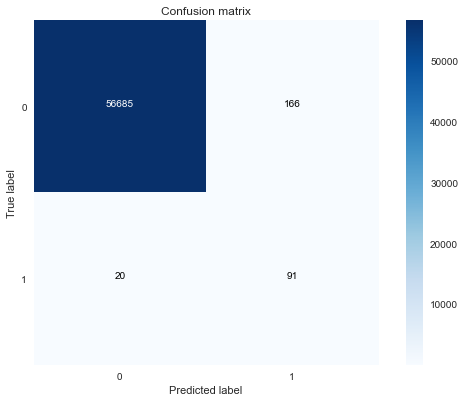

In [52]:
# plot confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.grid(False)
plt.show()